In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [36]:
#This is the equivalent of ncdump

filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_hydro_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'ssr': <xarray.Variable (time: 504, 

In [8]:
#This is the equivalent of ncdump

filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_hydro_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'ssr': <xarray.Variable (time: 504, 

In [ ]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    ssr = ds['ssr'].mean(['time','longitude']).values#incoming, from solar, positive is down
    stherm = ds['str'].mean(['time','longitude']).values#incoming, from atmosphere, positive is down
    tsr = ds['tsr'].mean(['time','longitude']).values#outgoing, TOA, shortwave, mostly incoming, positive is down
    ttr = ds['ttr'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal, mostly outgoing, positive is down

In [5]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    slhf = ds['slhf'].mean(['time','longitude']).values#latent heat flux
    sshf = ds['sshf'].mean(['time','longitude']).values#sensible heat flux

In [6]:
import xarray as xr
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    ssrc = ds['ssrc'].mean(['time','longitude']).values#incoming, from solar, positive is down
    strc = ds['strc'].mean(['time','longitude']).values#incoming, from atmosphere, positive is down
    tsrc = ds['tsrc'].mean(['time','longitude']).values#outgoing, TOA, shortwave, mostly incoming, positive is down
    ttrc = ds['ttrc'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal, mostly outgoing, positive is down

Text(0.5, 0, 'latitude')

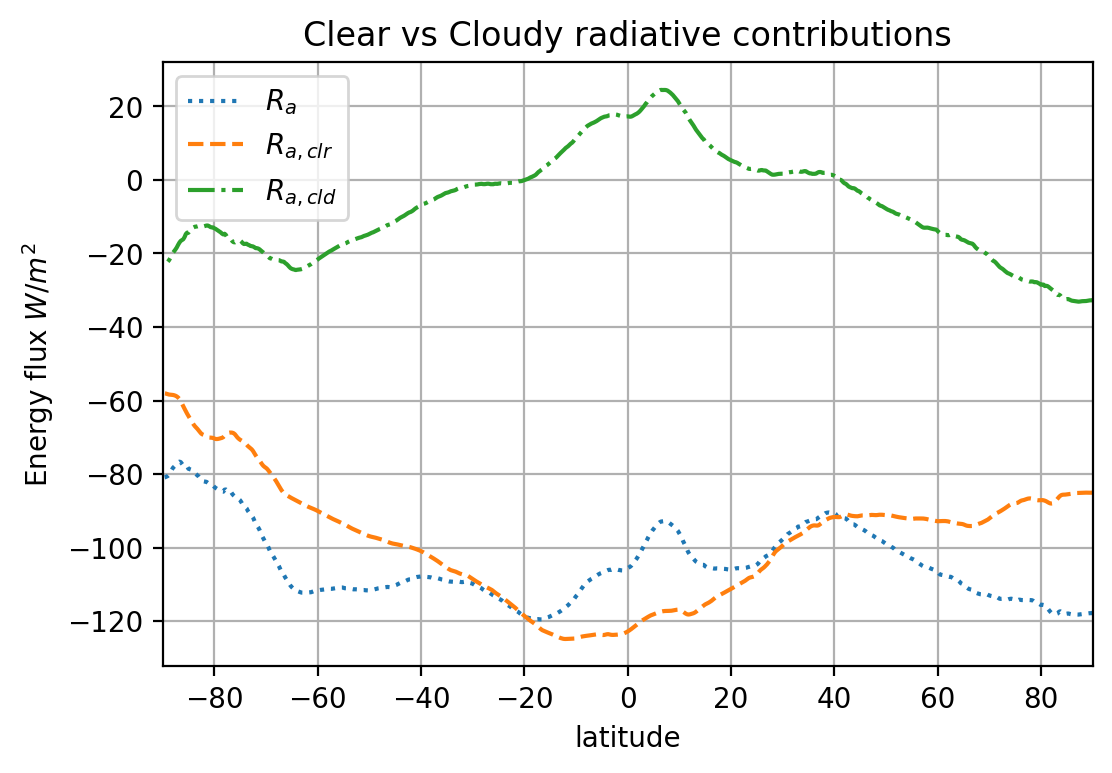

In [36]:
tot_rad = -ssr-stherm+tsr+ttr
clear_rad = (tsrc+ttrc-ssrc-strc)
cloud_rad = tot_rad-clear_rad
DFa = tot_rad-slhf-sshf
time_norm = 86400#seconds per day
lns=[]
plt.figure(dpi=200)
#lns=lns+plt.plot(latitude,ssr/time_norm,linestyle='dotted',label='surface shortwave')
#lns=lns+plt.plot(latitude,stherm/time_norm,linestyle='dashed',label='surface longwave')
#lns=lns+plt.plot(latitude,-(ssr+stherm)/time_norm,linestyle='dotted',label='total')
#lns=lns+plt.plot(latitude,tsr/time_norm,linestyle='dashdot',label='solar')
#lns=lns+plt.plot(latitude,ttr/time_norm,label='thermal')
#lns=lns+plt.plot(latitude,(tsr+ttr)/time_norm,linestyle='dotted',label='total')
#lns=lns+plt.plot(latitude,ssrc/time_norm,linestyle='dotted',label='shortwave CS')
#lns=lns+plt.plot(latitude,strc/time_norm,linestyle='dashed',label='longwave CS')
#lns=lns+plt.plot(latitude,-(ssrc+strc)/time_norm,linestyle='dashed',label='CS')
#lns=lns+plt.plot(latitude,tsrc/time_norm,linestyle='dashdot',label='solar CS')
#lns=lns+plt.plot(latitude,ttrc/time_norm,label='thermal CS')
#lns=lns+plt.plot(latitude,(tsrc+ttrc)/time_norm,linestyle='dashed',label='CS')
#lns=lns+plt.plot(latitude,(tsr-tsrc)/time_norm,linestyle='dashdot',label='solar CRE')
#lns=lns+plt.plot(latitude,(ttr-ttrc)/time_norm,label='thermal CRE')
#lns=lns+plt.plot(latitude,(tsr-tsrc+ttr-ttrc)/time_norm,linestyle='dashdot',label='CRE')
#lns=lns+plt.plot(latitude,-(ssr-ssrc+stherm-strc)/time_norm,linestyle='dashdot',label='CRE')
#lns=lns+plt.plot(latitude,(ssr-ssrc)/time_norm,linestyle='dotted',label='shortwave CRE')
#lns=lns+plt.plot(latitude,(stherm-strc)/time_norm,linestyle='dashed',label='longwave CRE')
lns=lns+plt.plot(latitude,tot_rad/time_norm,linestyle='dotted',label=r'$R_a$')
lns=lns+plt.plot(latitude,clear_rad/time_norm,linestyle='dashed',label=r'$R_{a,clr}$')
lns=lns+plt.plot(latitude,cloud_rad/time_norm,linestyle='dashdot',label=r'$R_{a,cld}$')
#lns=lns+plt.plot(latitude,-slhf/time_norm,linestyle='dashed',label='LE')
#lns=lns+plt.plot(latitude,-sshf/time_norm,linestyle='dashdot',label='SH')
#lns=lns+plt.plot(latitude,DFa/time_norm,label=r'$\Delta F_a$')
plt.xlim(latitude.min(), latitude.max())
plt.grid(True)
plt.legend(loc=0)
#plt.title('TOA radiation decomposition')
#plt.title('Surface radiation decomposition')
plt.title('Clear vs Cloudy radiative contributions')
plt.ylabel(r'Energy flux $W/m^2$')
plt.xlabel('latitude')

Text(0.5, 1.0, 'Contributions to $R_1$ from CRE and clear sky effects')

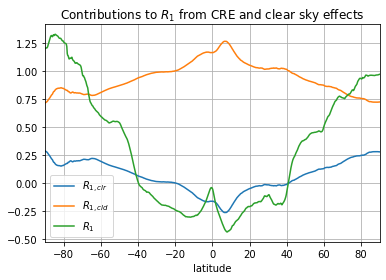

In [48]:
lns=[]
lns=lns+plt.plot(latitude,(tot_rad-clear_rad)/tot_rad,label=r'$R_{1,clr}$')
lns=lns+plt.plot(latitude,(tot_rad-cloud_rad)/tot_rad,label=r'$R_{1,cld}$')
lns = lns+plt.plot(latitude, (1-(slhf+sshf)/tot_rad),label=r'$R_1$')
plt.xlim(latitude.min(), latitude.max())
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('latitude')
plt.title(r'Contributions to $R_1$ from CRE and clear sky effects')

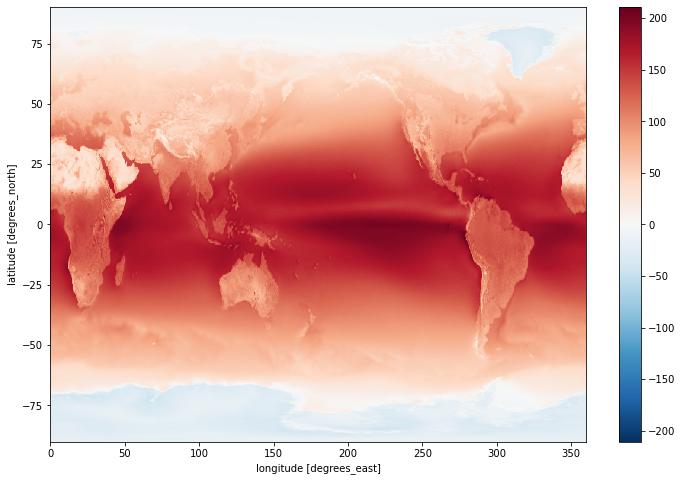

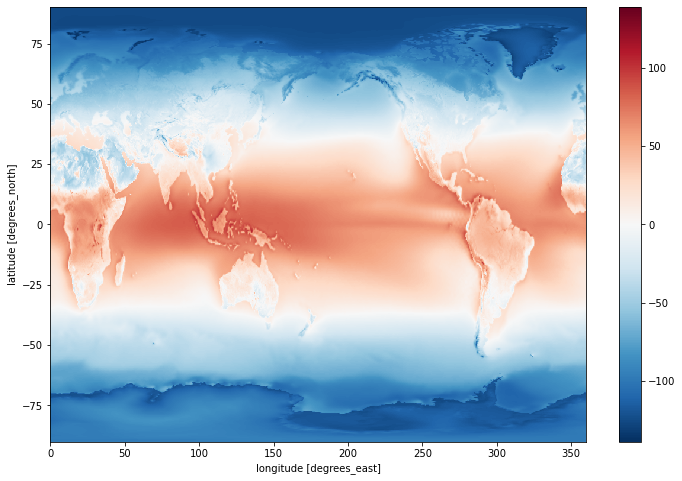

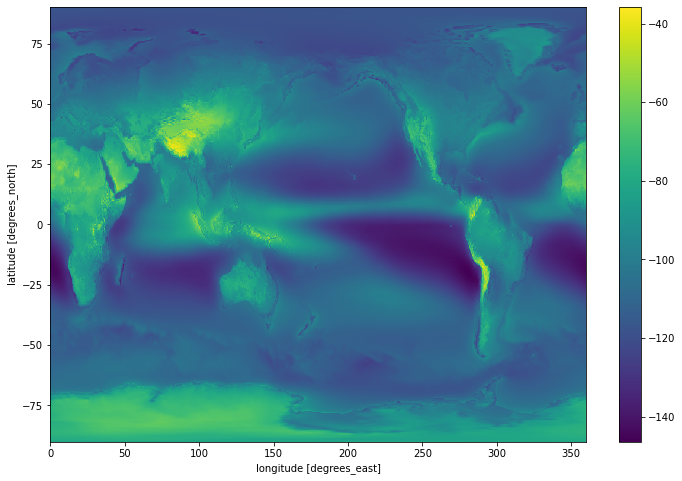

In [25]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
    surface=(ds['ssr'].mean(['time'])+ds['str'].mean('time'))/time_norm
    surface.plot(aspect=1.5,size=8)
    toa=(ds['tsr'].mean(['time'])+ds['ttr'].mean('time'))/time_norm
    toa.plot(aspect=1.5,size=8)
    tot=toa-surface
    tot.plot(aspect=1.5,size=8)

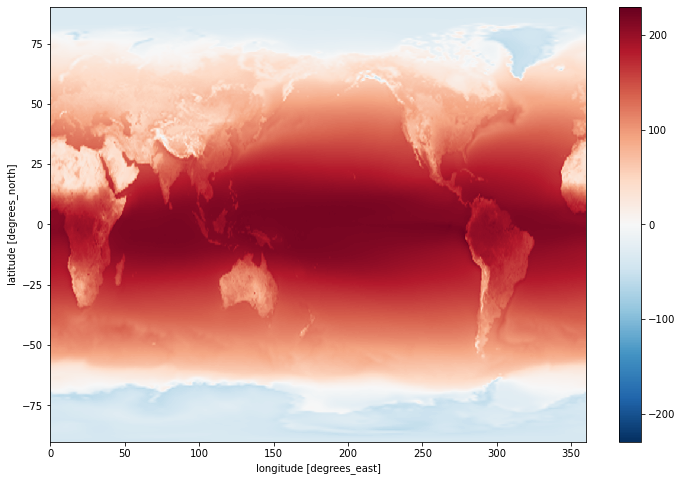

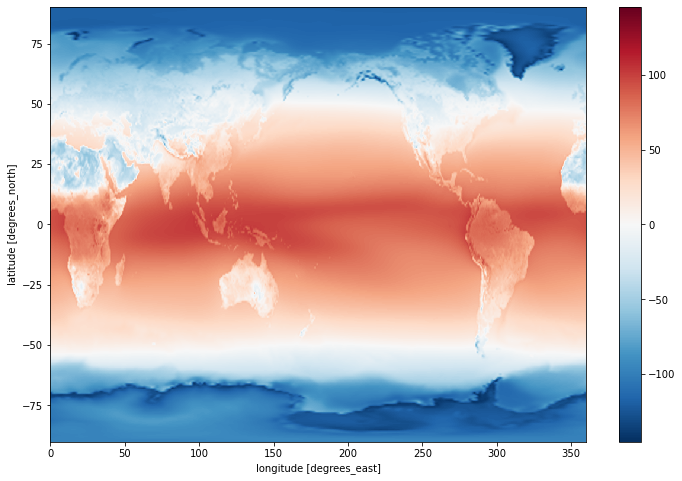

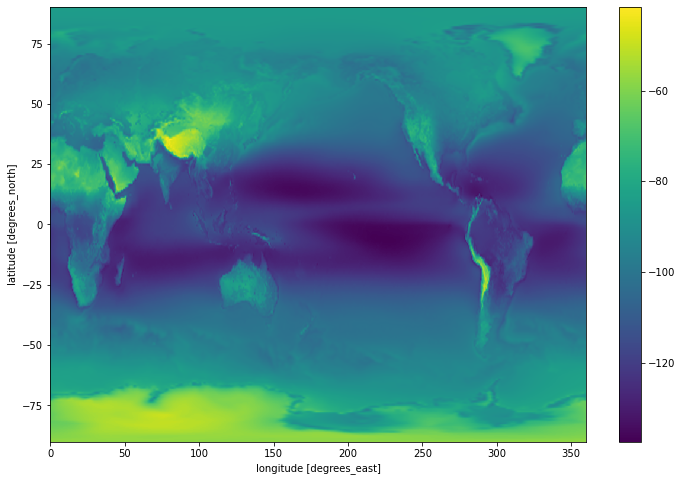

In [33]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
time_norm = 86400

with xr.open_dataset(filesource) as ds:
    surfacecs=(ds['ssrc']/time_norm).mean(['time'])+(ds['strc']/time_norm).mean('time')
    surfacecs.plot(aspect=1.5,size=8)
    toacs=(ds['tsrc'].mean(['time'])+ds['ttrc'].mean('time'))/time_norm
    toacs.plot(aspect=1.5,size=8)
    totcs=toacs-surfacecs
    totcs.plot(aspect=1.5,size=8)

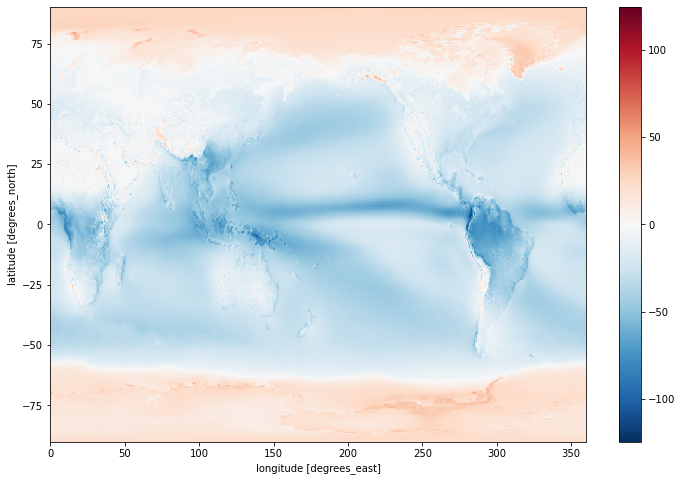

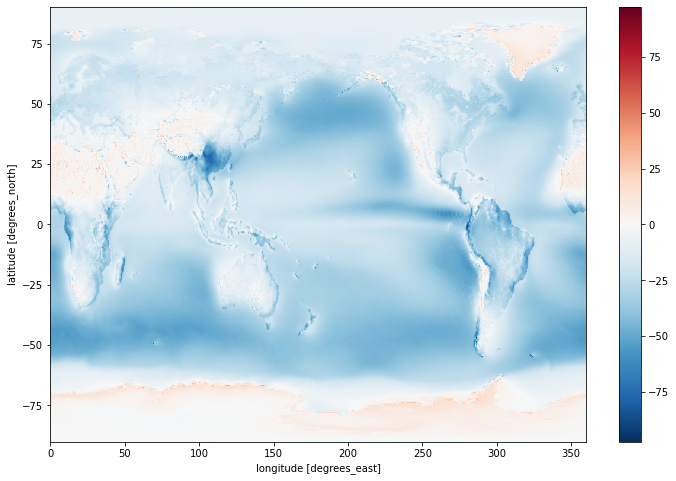

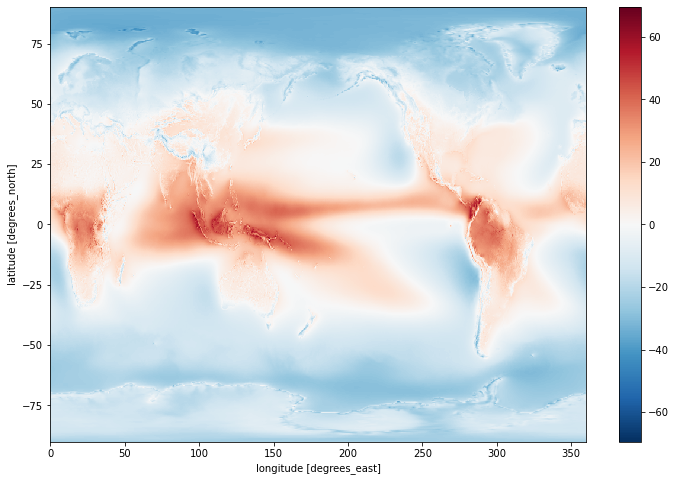

In [27]:
surface_cre = surface-surfacecs
toa_cre = toa-toacs
tot_cre=tot-totcs
surface_cre.plot(aspect=1.5,size=8)
toa_cre.plot(aspect=1.5,size=8)
tot_cre.plot(aspect=1.5,size=8)

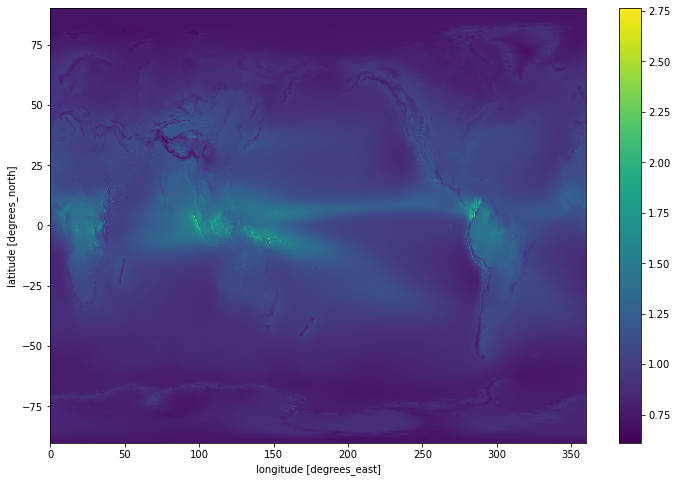

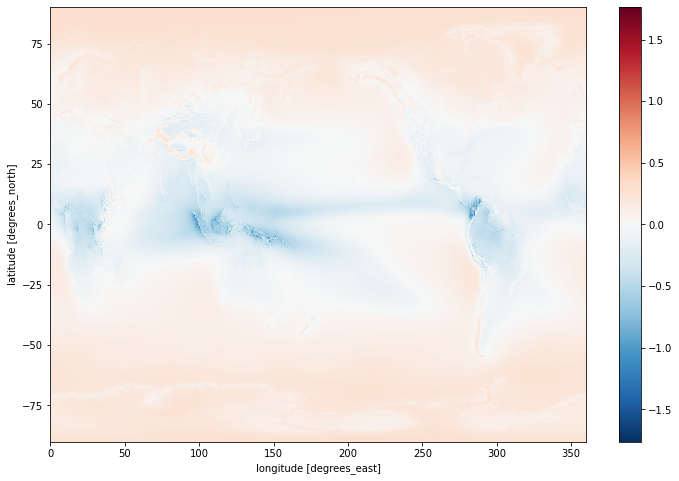

In [30]:
R1_CRE = 1-tot_cre/tot
R1_CRE.plot(aspect=1.5,size=8)
R1_CS = 1-totcs/tot
R1_CS.plot(aspect=1.5,size=8)

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    spatial_avg=ds.mean(['latitude','longitude'])

In [ ]:
print (spatial_avg.variables)